
# CODDE VGG16 AND Res Net 50

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import os
import numpy as np
from PIL import Image
from keras.applications import VGG16, ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report



folder_path = '/content/drive/MyDrive/810100188-sobhan-alaeddini-Project1/Data-Dermoscopic _Images'

images = []
labels = []

subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

for label, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(folder_path, subfolder)
    file_list = os.listdir(subfolder_path)

    for file_name in file_list:
        if file_name.endswith('.jpg'):
            file_path = os.path.join(subfolder_path, file_name)
            img = Image.open(file_path)

            img = img.resize((128, 128))

            img_array = np.array(img)

            images.append(img_array)
            labels.append(label)


images = np.array(images)
labels = np.array(labels)


np.save('/content/images.npy', images)
np.save('/content/labels.npy', labels)



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/810100188-sobhan-alaeddini-Project1/Data-Dermoscopic _Images'

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

images = images.astype('float32') / 255.0

num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

np.save('/content/X_train.npy', X_train)
np.save('/content/X_test.npy', X_test)
np.save('/content/y_train.npy', y_train)
np.save('/content/y_test.npy', y_test)
print(X_train)
print(y_test)



[[[[0.6666667  0.54509807 0.42745098]
   [0.6745098  0.5529412  0.42745098]
   [0.6784314  0.5529412  0.43137255]
   ...
   [0.6862745  0.65882355 0.52156866]
   [0.6784314  0.6509804  0.5254902 ]
   [0.6862745  0.6666667  0.5411765 ]]

  [[0.6666667  0.5529412  0.43137255]
   [0.67058825 0.54509807 0.42352942]
   [0.6784314  0.5529412  0.42745098]
   ...
   [0.6862745  0.6627451  0.53333336]
   [0.6901961  0.6666667  0.5411765 ]
   [0.69411767 0.67058825 0.54509807]]

  [[0.67058825 0.56078434 0.44705883]
   [0.6745098  0.54509807 0.42352942]
   [0.67058825 0.5254902  0.3882353 ]
   ...
   [0.6901961  0.6666667  0.5372549 ]
   [0.6901961  0.6666667  0.5411765 ]
   [0.69411767 0.6666667  0.54901963]]

  ...

  [[0.72156864 0.627451   0.5411765 ]
   [0.70980394 0.6156863  0.52156866]
   [0.7176471  0.6313726  0.5568628 ]
   ...
   [0.6901961  0.6313726  0.49803922]
   [0.6784314  0.6156863  0.47843137]
   [0.6666667  0.6        0.45882353]]

  [[0.7137255  0.61960787 0.5254902 ]
   [0.7

In [2]:
from re import X
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Sequential

def build_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()

    model.add(base_model)

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))

    return model




In [ ]:
from re import X
from keras.layers import Dense, Dropout, Flatten,BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential, Model

def build_resnet50_model(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)

    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    return base_model, model

In [ ]:
vgg16_model = build_vgg16_model(num_classes)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = vgg16_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

vgg16_preds = vgg16_model.predict(X_test)
vgg16_report = classification_report(np.argmax(y_test, axis=1), np.argmax(vgg16_preds, axis=1))
print("VGG16 Classification Report:")
print(vgg16_report)

Epoch 1/100
9/9 [==============================] - 4s 96ms/step - loss: 1.6220 - accuracy: 0.3188 - val_loss: 2.7485 - val_accuracy: 0.2571
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 1.4626 - accuracy: 0.3768 - val_loss: 3.5315 - val_accuracy: 0.2571
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 1.4635 - accuracy: 0.3333 - val_loss: 2.4780 - val_accuracy: 0.2571
Epoch 4/100
9/9 [==============================] - 0s 36ms/step - loss: 1.6396 - accuracy: 0.3333 - val_loss: 2.3662 - val_accuracy: 0.2571
Epoch 5/100
9/9 [==============================] - 0s 36ms/step - loss: 1.3250 - accuracy: 0.4203 - val_loss: 1.6994 - val_accuracy: 0.2857
Epoch 6/100
9/9 [==============================] - 0s 36ms/step - loss: 1.4893 - accuracy: 0.3768 - val_loss: 1.5160 - val_accuracy: 0.4286
Epoch 7/100
9/9 [==============================] - 0s 36ms/step - loss: 1.2625 - accuracy: 0.4130 - val_loss: 1.2946 - val_accuracy: 0.4857
Epoch 8/100
9/9 [===

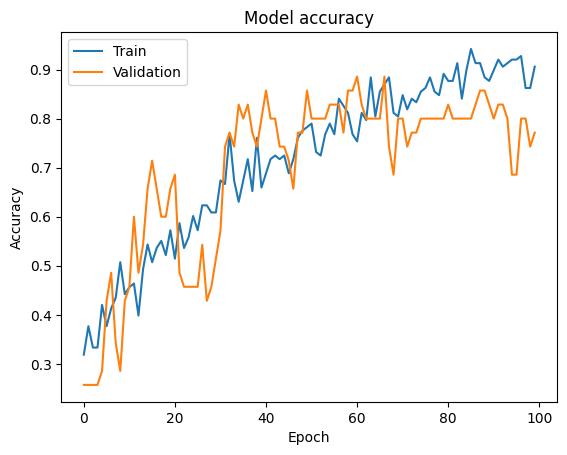

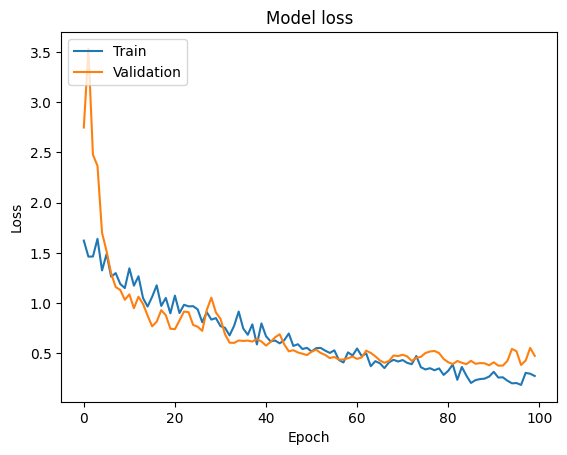

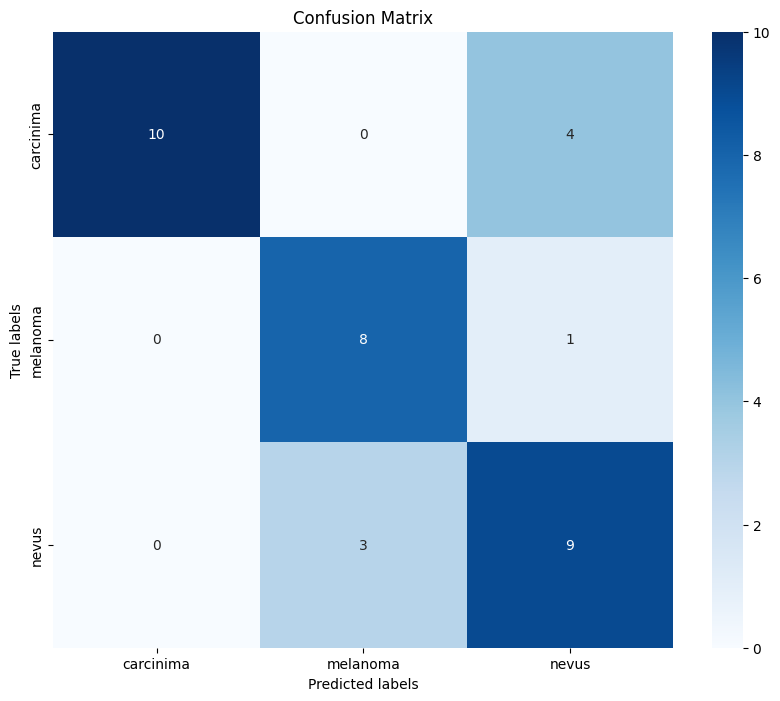

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

class_names = ['carcinima', 'melanoma', 'nevus']

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(vgg16_preds, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
base_model, resnet50_model = build_resnet50_model(num_classes)
for layer in base_model.layers:
  if(layer.name.endswith('bn')):
    layer.trainable = True
  else:
    layer.trainable = False

for i, layer in enumerate(resnet50_model.layers):
  print(i, layer.name, layer.trainable)

0 input_8 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn True
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn True
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn True
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn True
16 conv2_block1_3_bn True
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn True
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn True
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn True
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn True
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn True
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn True
37 conv2_block3_add False
38 conv2_block3_out Fals

In [ ]:
from sklearn.metrics import classification_report
from keras.optimizers import Adam



resnet50_model.compile(optimizer=Adam(learning_rate=2e-3), loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

resnet50_preds = resnet50_model.predict(X_test)

resnet50_report = classification_report(np.argmax(y_test, axis=1), np.argmax(resnet50_preds, axis=1))
print("ResNet50 Classification Report:")
print(resnet50_report)

Epoch 1/100
14/14 [==============================] - 21s 202ms/step - loss: 0.9654 - accuracy: 0.6232 - val_loss: 34.4413 - val_accuracy: 0.3429
Epoch 2/100
14/14 [==============================] - 1s 95ms/step - loss: 0.3606 - accuracy: 0.8623 - val_loss: 58.0132 - val_accuracy: 0.4000
Epoch 3/100
14/14 [==============================] - 1s 65ms/step - loss: 0.2895 - accuracy: 0.8406 - val_loss: 47.3876 - val_accuracy: 0.4000
Epoch 4/100
14/14 [==============================] - 1s 74ms/step - loss: 0.1782 - accuracy: 0.9203 - val_loss: 31.7859 - val_accuracy: 0.4000
Epoch 5/100
14/14 [==============================] - 1s 68ms/step - loss: 0.1849 - accuracy: 0.9275 - val_loss: 15.9762 - val_accuracy: 0.4571
Epoch 6/100
14/14 [==============================] - 1s 95ms/step - loss: 0.0681 - accuracy: 0.9783 - val_loss: 12.9686 - val_accuracy: 0.5143
Epoch 7/100
14/14 [==============================] - 1s 46ms/step - loss: 0.1215 - accuracy: 0.9565 - val_loss: 11.6604 - val_accuracy: 0.48

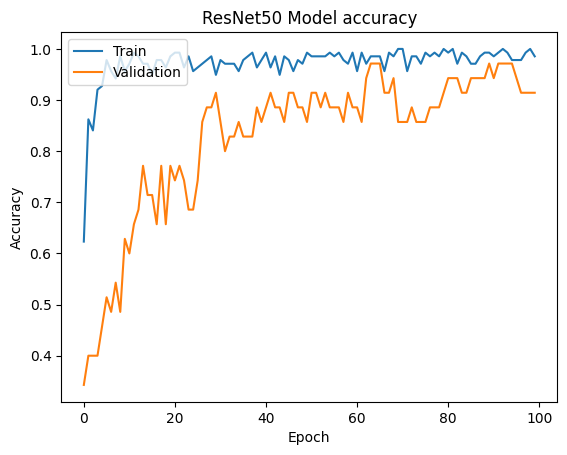

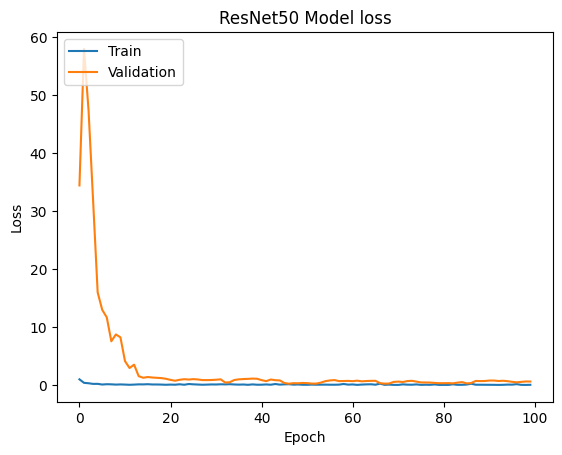

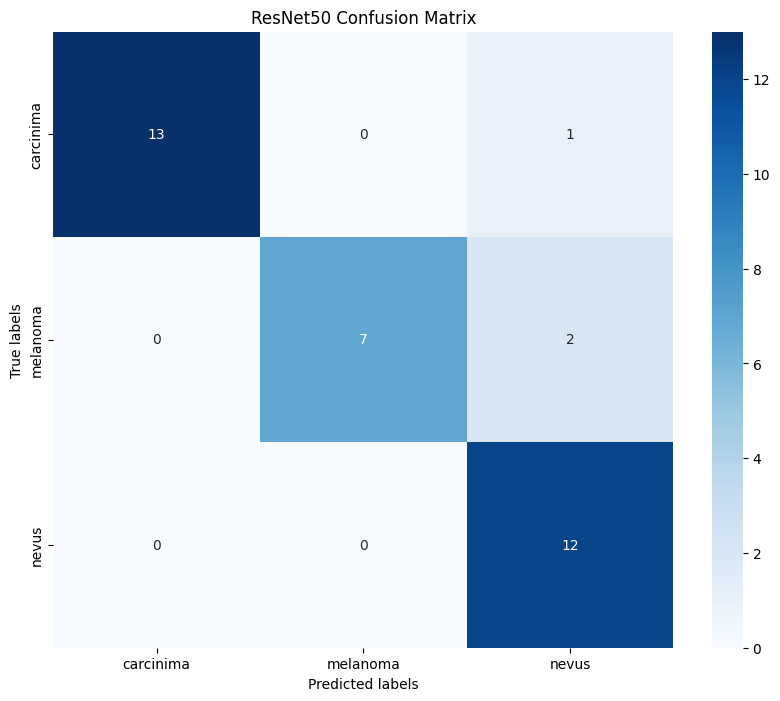

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.plot(resnet50_history.history['accuracy'])
plt.plot(resnet50_history.history['val_accuracy'])
plt.title('ResNet50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(resnet50_history.history['loss'])
plt.plot(resnet50_history.history['val_loss'])
plt.title('ResNet50 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

resnet50_conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(resnet50_preds, axis=1))
class_names = ['carcinima', 'melanoma', 'nevus']

plt.figure(figsize=(10, 8))
sns.heatmap(resnet50_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

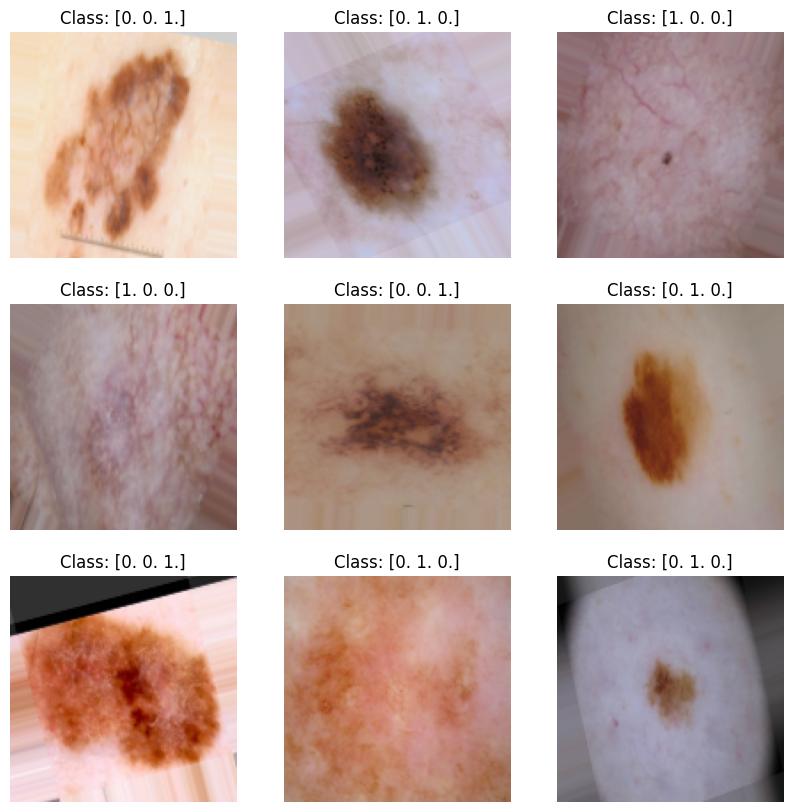

In [ ]:

import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    rotation_range = 30,
    zoom_range = (0.75, 1.25)
).flow(
    x = X_train,
    y = y_train,
    batch_size=10
)


valid_datagen = ImageDataGenerator().flow(
    x = X_test,
    y = y_test,
    batch_size = 10
)


batch_x, batch_y = train_datagen.next()

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_x[i])
    plt.title(f'Class: {batch_y[i]}')
    plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

vgg16_model = build_vgg16_model(num_classes)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = vgg16_model.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=200, validation_data=(X_test, y_test))

vgg16_preds = vgg16_model.predict(X_test)
vgg16_report = classification_report(np.argmax(y_test, axis=1), np.argmax(vgg16_preds, axis=1))
print("VGG16 Classification Report:")
print(vgg16_report)

Epoch 1/100
9/9 [==============================] - 3s 108ms/step - loss: 1.6029 - accuracy: 0.3478 - val_loss: 0.9527 - val_accuracy: 0.5714
Epoch 2/100
9/9 [==============================] - 1s 132ms/step - loss: 1.4960 - accuracy: 0.3333 - val_loss: 2.1007 - val_accuracy: 0.3429
Epoch 3/100
9/9 [==============================] - 1s 79ms/step - loss: 1.4424 - accuracy: 0.3768 - val_loss: 2.4075 - val_accuracy: 0.3429
Epoch 4/100
9/9 [==============================] - 1s 82ms/step - loss: 1.4170 - accuracy: 0.3768 - val_loss: 2.1323 - val_accuracy: 0.4000
Epoch 5/100
9/9 [==============================] - 1s 81ms/step - loss: 1.2878 - accuracy: 0.4565 - val_loss: 2.1183 - val_accuracy: 0.2857
Epoch 6/100
9/9 [==============================] - 1s 79ms/step - loss: 1.4046 - accuracy: 0.3768 - val_loss: 1.9067 - val_accuracy: 0.2571
Epoch 7/100
9/9 [==============================] - 1s 80ms/step - loss: 1.2017 - accuracy: 0.5000 - val_loss: 1.5317 - val_accuracy: 0.2571
Epoch 8/100
9/9 [=

In [ ]:
from sklearn.metrics import classification_report
from keras.optimizers import Adam

base_model, resnet50_model = build_resnet50_model(num_classes)
for layer in base_model.layers:
    if(layer.name.endswith('bn')):
        layer.trainable = True
    else:
        layer.trainable = False

resnet50_model.compile(optimizer=Adam(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

resnet50_history = resnet50_model.fit_generator(
    train_datagen,
    steps_per_epoch=len(X_train) // 10,
    epochs=100,
    validation_data=valid_datagen,
    validation_steps=len(X_test) // 10,
)

resnet50_preds = resnet50_model.predict(X_test)
resnet50_report = classification_report(np.argmax(y_test, axis=1), np.argmax(resnet50_preds, axis=1))
print("ResNet50 Classification Report:")
print(resnet50_report)


Epoch 1/100


<ipython-input-15-ef885343180d>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet50_history = resnet50_model.fit_generator(


13/13 [==============================] - 7s 214ms/step - loss: 1.2111 - accuracy: 0.4531 - val_loss: 1.2327 - val_accuracy: 0.2667
Epoch 2/100
13/13 [==============================] - 1s 57ms/step - loss: 0.8264 - accuracy: 0.6250 - val_loss: 1.1895 - val_accuracy: 0.3000
Epoch 3/100
13/13 [==============================] - 1s 61ms/step - loss: 0.8117 - accuracy: 0.6641 - val_loss: 1.2246 - val_accuracy: 0.2333
Epoch 4/100
13/13 [==============================] - 1s 63ms/step - loss: 0.8729 - accuracy: 0.6172 - val_loss: 1.2526 - val_accuracy: 0.2333
Epoch 5/100
13/13 [==============================] - 1s 61ms/step - loss: 0.6476 - accuracy: 0.6953 - val_loss: 1.2103 - val_accuracy: 0.2333
Epoch 6/100
13/13 [==============================] - 1s 62ms/step - loss: 0.6719 - accuracy: 0.7344 - val_loss: 1.1884 - val_accuracy: 0.2667
Epoch 7/100
13/13 [==============================] - 1s 61ms/step - loss: 0.6997 - accuracy: 0.7578 - val_loss: 1.1697 - val_accuracy: 0.3000
Epoch 8/100
13/13

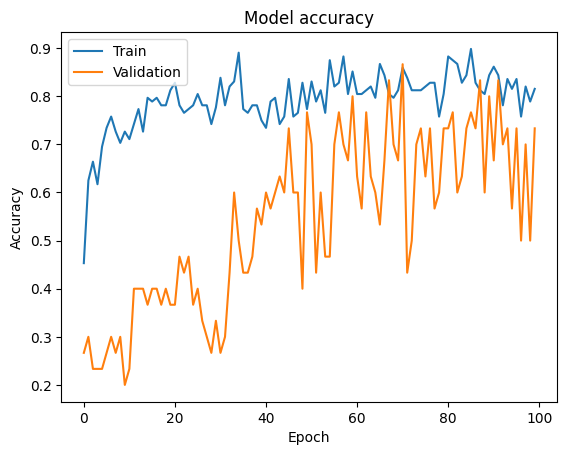

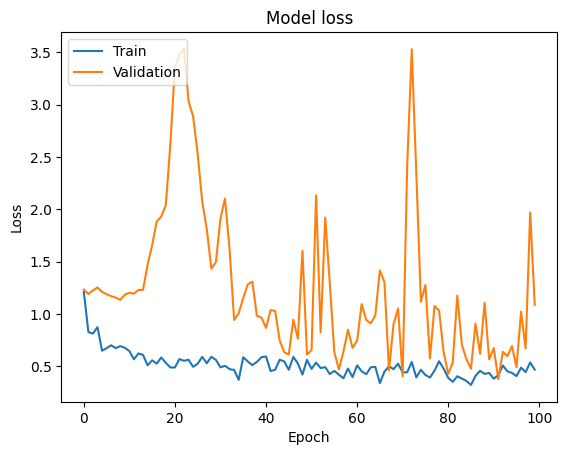

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(resnet50_history.history['accuracy'])
plt.plot(resnet50_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(resnet50_history.history['loss'])
plt.plot(resnet50_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# VGG16 and ResNet50

**VGG16 Architecture**



*   VGG16, developed by the Visual Geometry Group at the University of Oxford, comprises 16 layers.


*  It consists of 13 convolutional layers followed by 3 fully connected layers.



*   VGG16 employs 3x3 filters with a stride of 1 and always uses a padding of 1   pixel to preserve spatial resolution



*   Max-pooling layers of size 2x2 are utilized to reduce spatial dimensions.



*   Throughout the network, the Rectified Linear Unit (ReLU) activation function is used to introduce non-linearity.


*    The final three layers of VGG16 are fully connected layers with 4096 neurons each, followed by an output layer with 1000 neurons for classification.


*    With approximately 138 million parameters, VGG16 is a deep and parameter-rich network.


* Weight Initialization: The model weights are initialized using a method called ‘Glorot Uniform’ or ‘Xavier Uniform’ initialization. This method scales the weights according to the number of input and output neurons, which can lead to faster convergence during training.


Its simplicity in architecture with uniform layer configuration makes it easy to understand and implement.
However, VGG16 suffers from high computational cost due to its depth and large number of parameters.





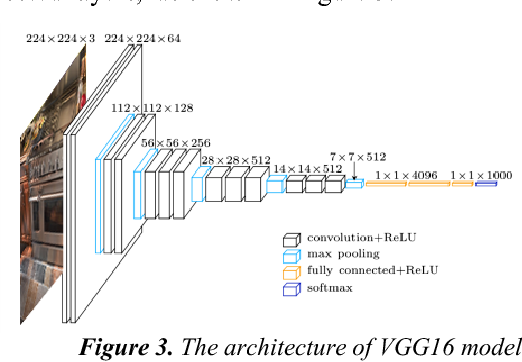

![image.png](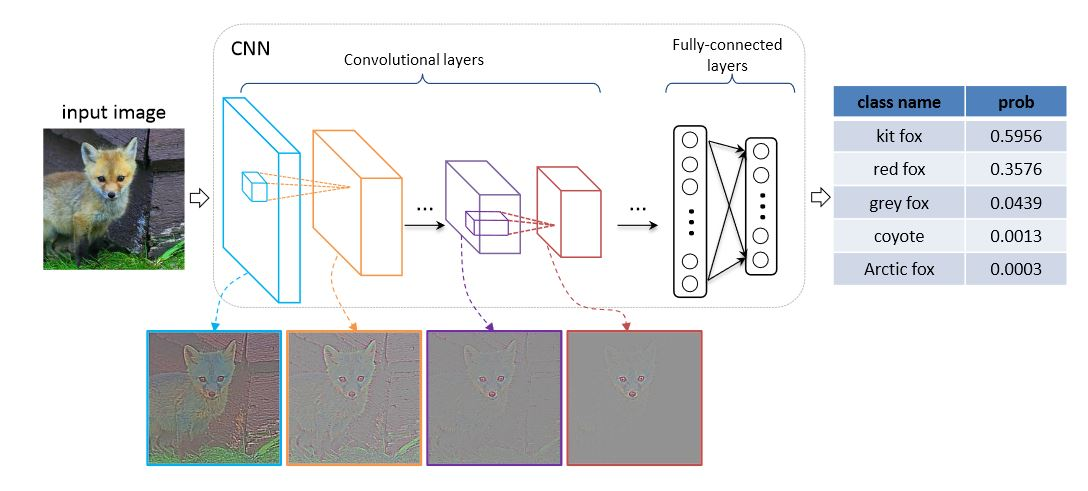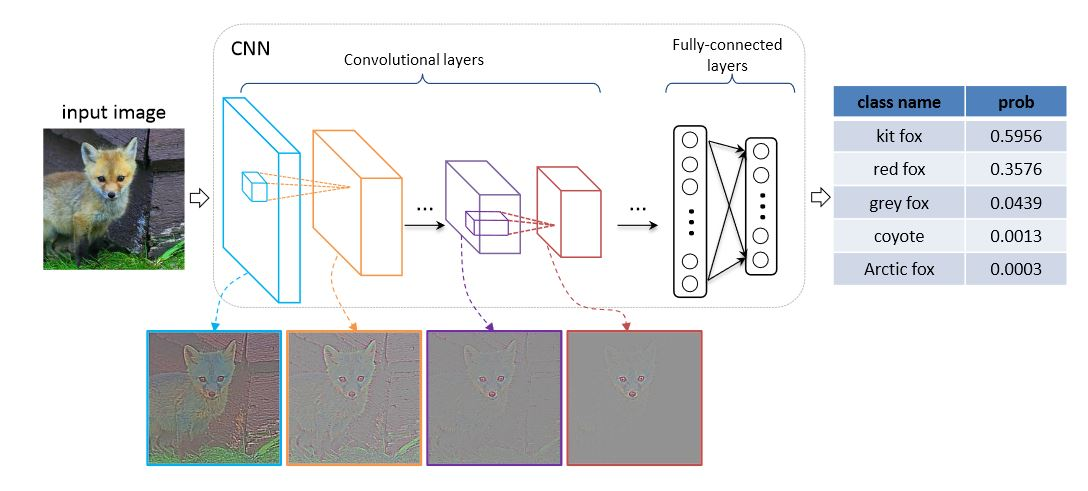)


 <b>ResNet50 Architecture</b>

*   It innovatively *introduced* the concept of residual learning, enabling the training of much deeper networks effectively.

*   ResNet50 utilizes skip connections or shortcuts to jump over some layers, mitigating the vanishing gradient problem.

*   The network is comprised of several building blocks called residual blocks, each containing multiple convolutional layers.

*   Each residual block in ResNet50 consists of two convolutional layers, with shortcut connections adding the original input to the output of the block.



Similar to VGG16, ResNet50 concludes with average pooling and fully connected layers for classification.
Despite its deeper architecture, ResNet50 has approximately 25 million parameters, significantly fewer than VGG16


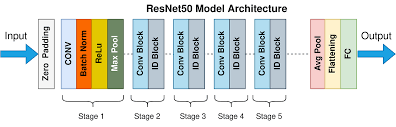

**Residual Learning:** ResNet50 introduced the concept of residual learning, which is implemented through residual blocks. Mathematically, instead of directly learning the desired underlying mapping
𝐻
(
𝑥
)
H(x), ResNet learns the residual mapping
𝐹
(
𝑥
)
=
𝐻
(
𝑥
)
−
𝑥
F(x)=H(x)−x. The original input
𝑥
x is added to the output of the residual block, allowing the network to learn residual functions. This helps alleviate the vanishing gradient problem and enables the training of much deeper networks.
Skip Connections: ResNet50 utilizes skip connections or shortcuts to jump over some layers. Mathematically, the shortcut connections add the original input
𝑥
x to the output of the residual block. This shortcut connection allows gradients to flow directly through the network without encountering significant attenuation, facilitating the training of very deep networks.
Residual Blocks: ResNet50 is comprised of several building blocks called residual blocks, each containing multiple convolutional layers. Each residual block consists of two convolutional layers followed by a shortcut connection.




**Skip Connections**: ResNet50 utilizes skip connections or shortcuts to jump over some layers. Mathematically, the shortcut connections add the original input
𝑥
x to the output of the residual block. This shortcut connection allows gradients to flow directly through the network without encountering significant attenuation, facilitating the training of very deep networks


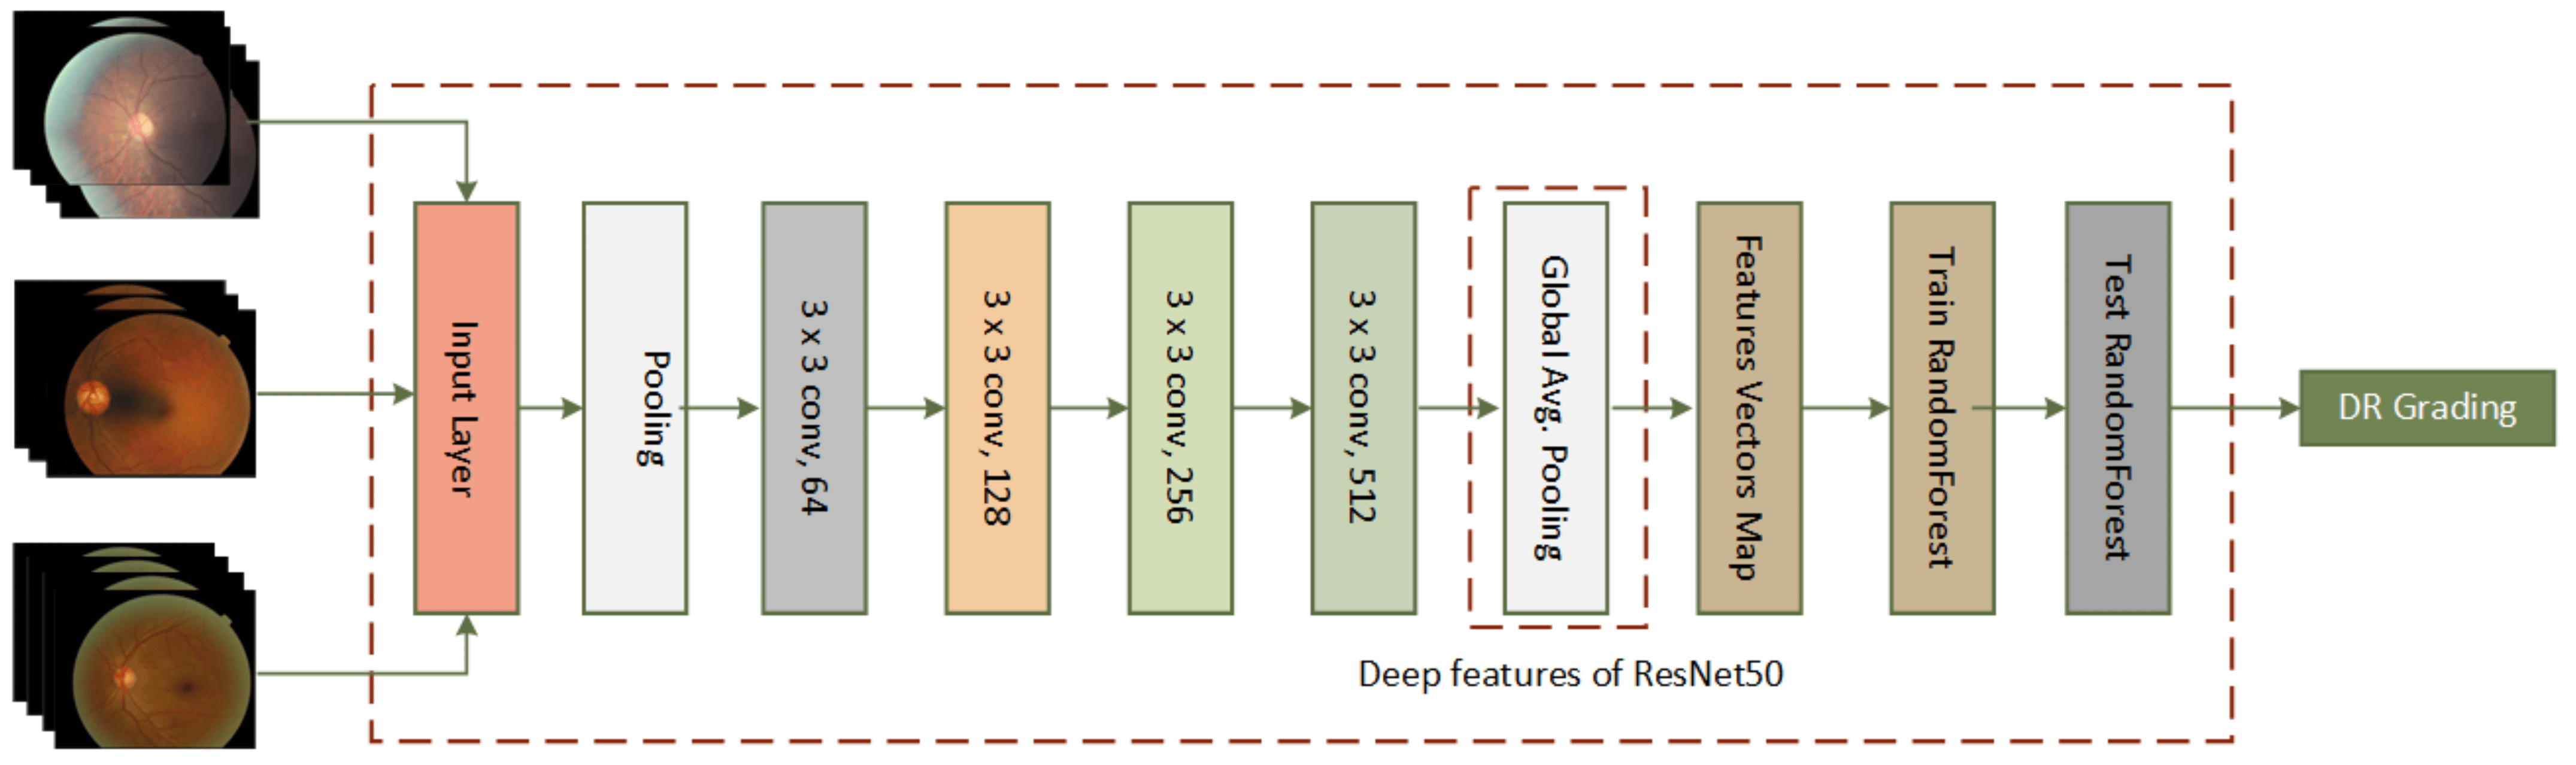

# Comparing VGG16 and ResNet50

<b>VGG16 is shallower with 16 layers, while ResNet50 is much deeper with 50 layers.
VGG16 has a larger number of parameters (138 million) compared to ResNet50 (25 million).
ResNet50 introduced skip connections, addressing the vanishing gradient problem, while VGG16 follows a more traditional architecture.
ResNet50 often achieves better performance on various tasks due to its deeper architecture and skip connections.</b>




# D. What are the advantages and disadvantages of data augmentation in Convolutional Neural
# Advantages of Data Augmentation:
<b>Increased Robustness</b>: By augmenting the training dataset with variations of the original images (such as rotation, translation, scaling, etc.), CNNs become more robust to changes in input data. This helps the model generalize better to unseen data, reducing overfitting.







<b>Enhanced Performance</b>: Data augmentation effectively expands the dataset size without actually collecting new data. With a larger and more diverse training set, CNNs can learn richer features and achieve better performance on the task at hand.


<b>Reduced Dependency on Large Datasets</b>: Data augmentation allows leveraging small datasets more effectively. Instead of requiring massive amounts of labeled data, practitioners can generate additional training samples, thus alleviating the need for extensive data collection efforts.
Improved Learning of Invariant Features: Augmenting the data with various transformations encourages the model to learn features that are invariant to those transformations. For instance, rotation augmentation encourages the CNN to learn rotation-invariant features.
Disadvantages of Data Augmentation:

#Disadvantages of Data Augmentation:


<b>Increased Computational Cost</b>: Generating augmented data on-the-fly during training can significantly increase computational overhead, especially for complex transformations or large datasets. This can prolong training time and require more computational resources.
<b>Risk of Overfitting to Augmented Samples: While data augmentation helps prevent overfitting to the original training samples, there's a risk that the model might overfit to the augmented samples if the augmentation strategy is not carefully chosen or if applied excessively.
Loss of Interpretability: As the training data becomes more diverse due to augmentation, interpreting the learned features and decision boundaries of the CNN becomes more challenging. This can hinder the interpretability and explainability of the model.



<b>Conclusion</b>:
Data augmentation is a powerful technique for improving the performance and robustness of Convolutional Neural Networks. While it offers several advantages such as increased robustness, enhanced performance, and reduced dependency on large datasets, it also comes with certain disadvantages, including increased computational cost, risk of overfitting to augmented samples, and loss of interpretability. Therefore, practitioners should carefully design and validate their data augmentation strategies to strike the right balance between these factors.

# Discussion on the Use of Gradient Ascent

<b>However, optimizing the generator's objective function using gradient descent often leads to suboptimal results. This is because gradient descent aims to minimize the loss function, but in the case of the generator, it's more beneficial to maximize the probability of the discriminator being fooled by the generated samples.</b>



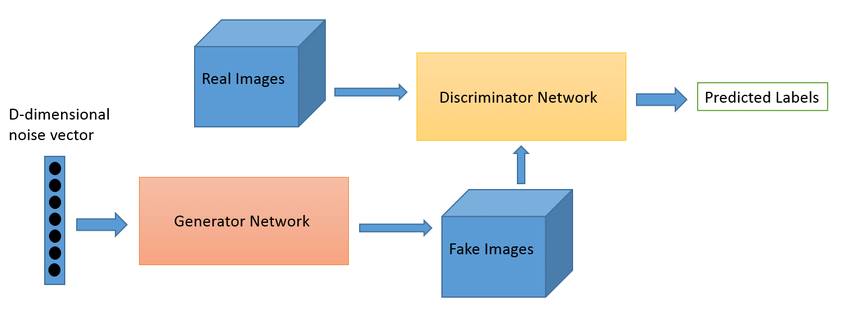

# Discussion on the Use of Gradient Ascent
However, optimizing the generator's objective function using gradient descent often leads to suboptimal results. This is because gradient descent aims to minimize the loss function, but in the case of the generator, it's more beneficial to maximize the probability of the discriminator being fooled by the generated samples.



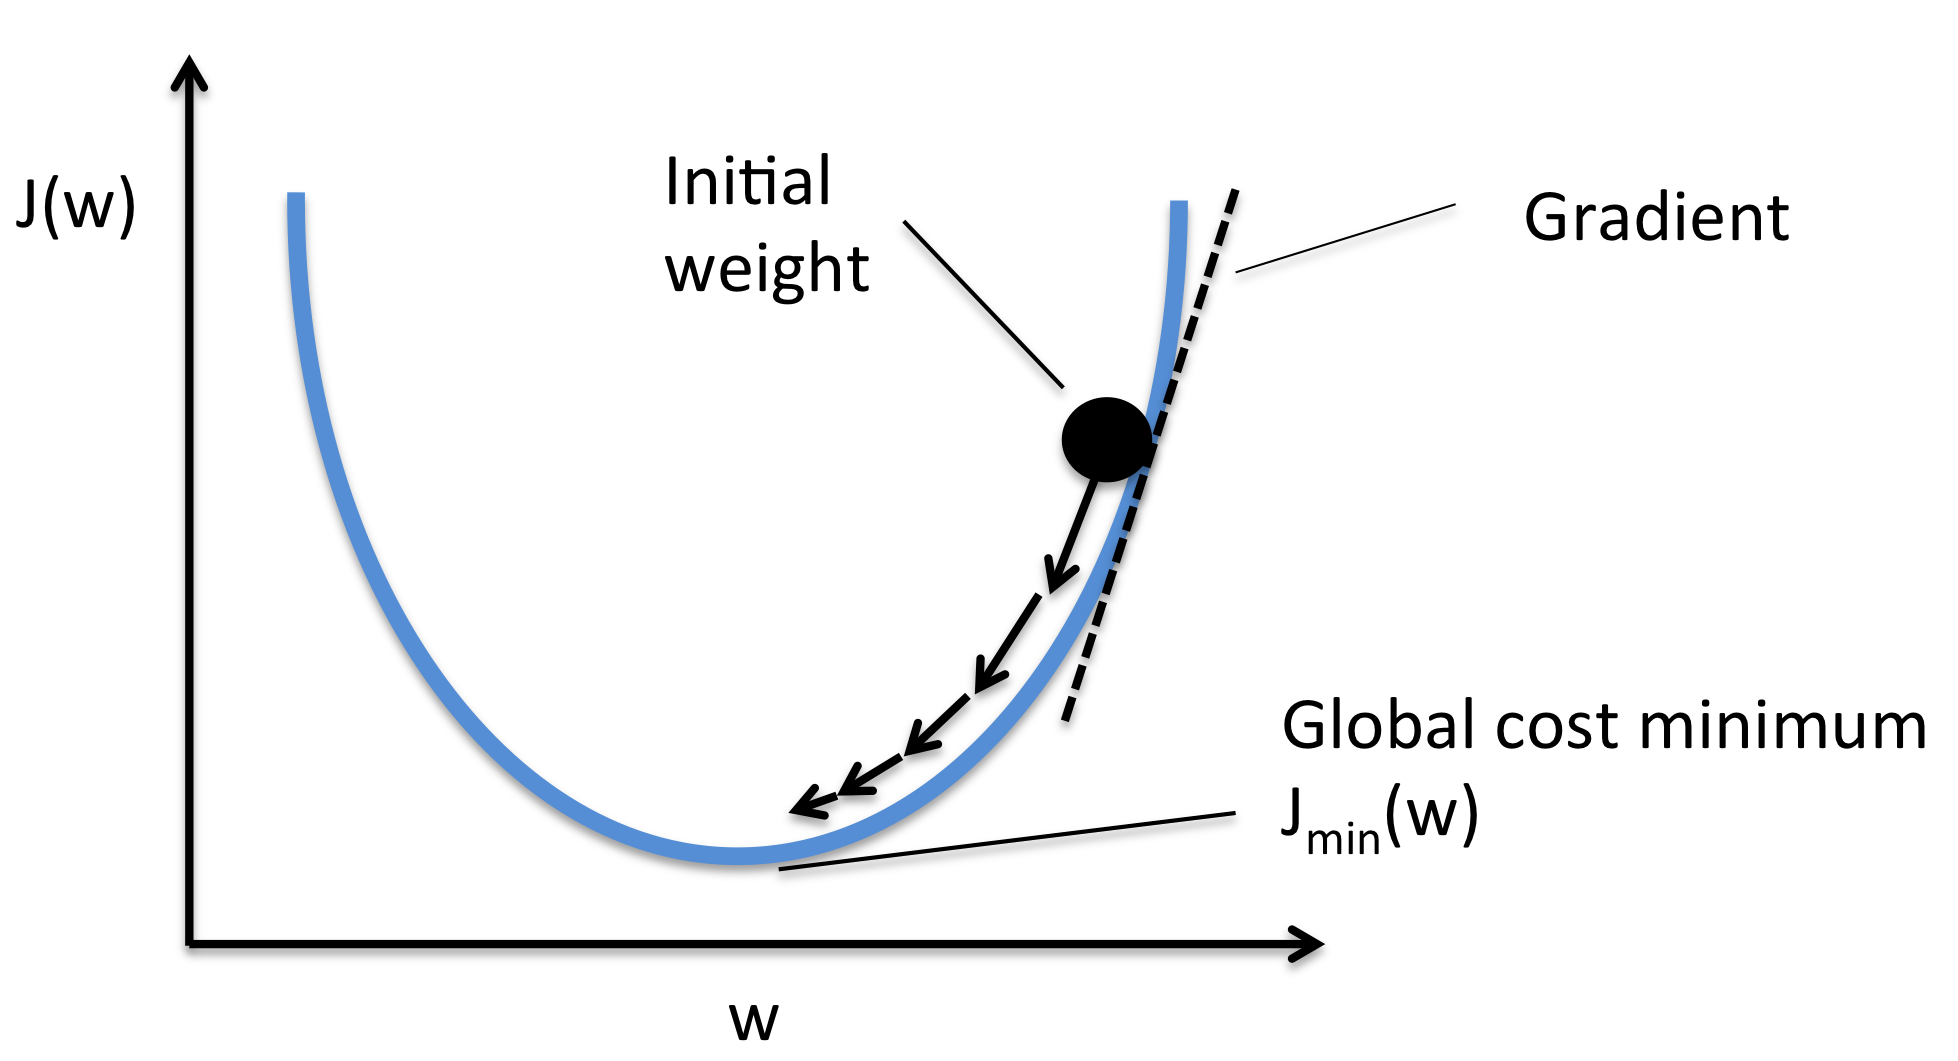

# **Example** **Demonstration**

Consider a simple example where we have a GAN tasked with generating images of handwritten digits (e.g., MNIST dataset). When using gradient descent to optimize the generator's objective function, the generator may converge to a local minimum where the generated images are easily distinguishable from real ones.

On the other hand, employing gradient ascent allows the generator to actively seek ways to produce more convincing samples that are more likely to fool the discriminator. This results in higher-quality generated images that closely resemble the real ones.





# Explain

<b>Gradient Descent for the Generator:</b>
When we use gradient descent to optimize the generator's objective function, we are essentially minimizing the difference between the generated samples and real samples according to the discriminator's judgment. The generator is trying to find parameters that make its generated samples look as close to real samples as possible. However, in practice, this can lead to the generator converging to a local minimum where it produces samples that might be distinguishable from real ones, but still fool the discriminator to some extent. This is because gradient descent minimizes the difference between the generated and real samples, but it may not necessarily prioritize making the generated samples indistinguishable from real ones.


<b>Gradient Ascent for the Generator:</b>
Conversely, when employing gradient ascent for the generator, we are maximizing its ability to fool the discriminator. Instead of minimizing the difference between generated and real samples, the generator actively seeks parameters that maximize the discriminator's inability to differentiate between real and fake samples. This encourages the generator to explore a wider range of possibilities and produce higher-quality samples that closely resemble real ones. By maximizing the discriminator's error, the generator learns to generate samples that are more likely to fool it, resulting in more convincing outputs.
Mathematically, during gradient ascent, the generator's parameters are updated in the direction that increases the discriminator's error, effectively pushing the generator towards generating more convincing samples. This encourages exploration of the parameter space, potentially escaping local minima where the generated samples are easily distinguishable from real ones.






In summary, while gradient descent aims to minimize the difference between generated and real samples, gradient ascent encourages the generator to actively seek ways to produce samples that are more likely to fool the discriminator, leading to higher-quality generated images that closely resemble real ones


# **Conclusion** ***and***  **Summary**


In conclusion, the use of gradient ascent over gradient descent for optimizing the generator's objective function in GANs is motivated by the need to encourage the generator to produce more realistic samples. By maximizing the probability of fooling the discriminator, the generator can learn to generate high-quality data samples that are indistinguishable from real ones.


# code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


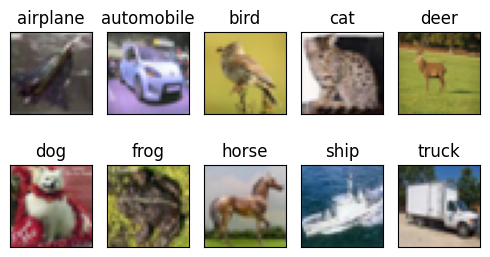

In [ ]:
WIDTH_SIZE = 5
HEIGHT_SIZE = 3

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
for i in range(num_classes):
    ax = plt.subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    img = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(img)

plt.tight_layout()


In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes)



X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

X_test = np.float32(X_test)
X_test = (X_test / 255 - 0.5) * 2
X_test = np.clip(X_test, -1, 1)

print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)

X_train reshape: (50000, 32, 32, 3)
X_test reshape: (10000, 32, 32, 3)


In [ ]:
z = tf.keras.layers.Input(shape=(100,))

labels = tf.keras.layers.Input(shape=(10,))

merged_layer = tf.keras.layers.Concatenate()([z, labels])

generator = tf.keras.layers.Dense(2 * 2 * 512)(merged_layer)
generator = tf.keras.layers.BatchNormalization()(generator)
generator = tf.keras.layers.LeakyReLU()(generator)
generator = tf.keras.layers.Reshape((2, 2, 512))(generator)

generator = tf.keras.layers.Conv2DTranspose(
    256, kernel_size=5, strides=2, padding="same", use_bias=False
)(generator)
generator = tf.keras.layers.BatchNormalization()(generator)
generator = tf.keras.layers.LeakyReLU()(generator)

generator = tf.keras.layers.Conv2DTranspose(
    128, kernel_size=5, strides=2, padding="same", use_bias=False
)(generator)
generator = tf.keras.layers.BatchNormalization()(generator)
generator = tf.keras.layers.LeakyReLU()(generator)

generator = tf.keras.layers.Conv2DTranspose(
    64, kernel_size=5, strides=2, padding="same", use_bias=False
)(generator)
generator = tf.keras.layers.BatchNormalization()(generator)
generator = tf.keras.layers.LeakyReLU()(generator)

generator = tf.keras.layers.Conv2DTranspose(
    3,
    kernel_size=5,
    strides=2,
    padding="same",
    use_bias=False,
    activation="tanh",
)(generator)

generator = tf.keras.models.Model(
    inputs=[z, labels], outputs=generator, name="generator"
)

In [ ]:
generator.summary()

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 110)                  0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 dense (Dense)               (None, 2048)                 227328    ['concatenate[0][0]'] 

In [ ]:
img_input = tf.keras.layers.Input(shape=(X_train[0].shape))

discriminator = tf.keras.layers.Conv2D(
    64, kernel_size=5, strides=2, padding="same"
)(img_input)
discriminator = tf.keras.layers.LeakyReLU()(discriminator)
discriminator = tf.keras.layers.Dropout(0.3)(discriminator)

discriminator = tf.keras.layers.Conv2D(
    128, kernel_size=5, strides=2, padding="same"
)(discriminator)
discriminator = tf.keras.layers.LeakyReLU()(discriminator)
discriminator = tf.keras.layers.Dropout(0.3)(discriminator)

discriminator = tf.keras.layers.Conv2D(
    256, kernel_size=5, strides=2, padding="same"
)(discriminator)
discriminator = tf.keras.layers.LeakyReLU()(discriminator)
discriminator = tf.keras.layers.Dropout(0.3)(discriminator)

discriminator = tf.keras.layers.Conv2D(
    512, kernel_size=5, strides=2, padding="same"
)(discriminator)
discriminator = tf.keras.layers.LeakyReLU()(discriminator)
discriminator = tf.keras.layers.Dropout(0.3)(discriminator)

discriminator = tf.keras.layers.Flatten()(discriminator)

merged_layer = tf.keras.layers.Concatenate()([discriminator, labels])
discriminator = tf.keras.layers.Dense(512, activation="relu")(merged_layer)

discriminator = tf.keras.layers.Dense(1, activation="sigmoid")(discriminator)

discriminator = tf.keras.models.Model(
    inputs=[img_input, labels], outputs=discriminator, name="discriminator"
)

In [ ]:
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 64)           4864      ['input_3[0][0]']             
                                                                                                  
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 64)           0         ['conv2d[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 16, 16, 64)           0         ['leaky_re_lu_4[0][0]']       
                                                                                      

In [ ]:
discriminator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

In [ ]:
discriminator.trainable = False

label = tf.keras.layers.Input(shape=(10,), name='label')
z = tf.keras.layers.Input(shape=(100,), name='z')

fake_img = generator([z, label])
validity = discriminator([fake_img, label])

d_g = tf.keras.models.Model([z, label], validity, name='adversarial')

d_g.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.5),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

epoch = 1/120, d_loss=0.394, g_loss=4.004                                                                                                     
1/1 [==============================] - 0s 384ms/step


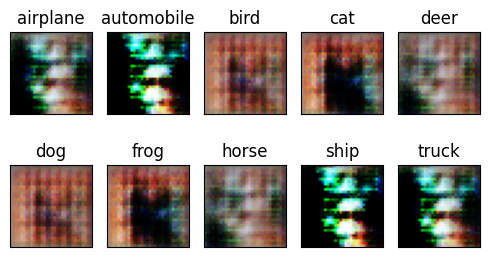

epoch = 2/120, d_loss=0.175, g_loss=1.201                                                                                                     
epoch = 3/120, d_loss=0.243, g_loss=3.166                                                                                                     
epoch = 4/120, d_loss=0.211, g_loss=4.302                                                                                                     
epoch = 5/120, d_loss=0.285, g_loss=3.776                                                                                                     
epoch = 6/120, d_loss=0.368, g_loss=3.595                                                                                                     
epoch = 7/120, d_loss=0.376, g_loss=2.943                                                                                                     
epoch = 8/120, d_loss=0.326, g_loss=2.559                                                                                                     

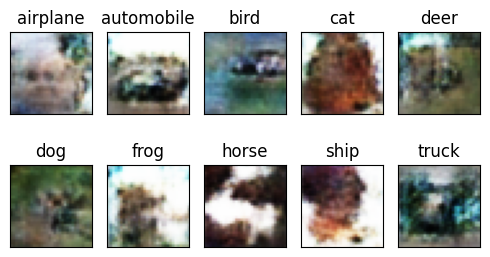

epoch = 12/120, d_loss=0.561, g_loss=2.000                                                                                                     
epoch = 13/120, d_loss=0.468, g_loss=2.080                                                                                                     
epoch = 14/120, d_loss=0.424, g_loss=2.912                                                                                                     
epoch = 15/120, d_loss=0.588, g_loss=2.617                                                                                                     
epoch = 16/120, d_loss=0.497, g_loss=2.181                                                                                                     
epoch = 17/120, d_loss=0.468, g_loss=2.472                                                                                                     
epoch = 18/120, d_loss=0.403, g_loss=2.472                                                                                              

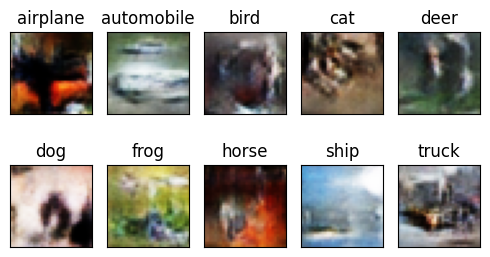

epoch = 22/120, d_loss=0.480, g_loss=2.982                                                                                                     
epoch = 23/120, d_loss=0.558, g_loss=2.626                                                                                                     
epoch = 24/120, d_loss=0.504, g_loss=2.301                                                                                                     
epoch = 25/120, d_loss=0.387, g_loss=2.463                                                                                                     
epoch = 26/120, d_loss=0.524, g_loss=2.240                                                                                                     
epoch = 27/120, d_loss=0.486, g_loss=2.245                                                                                                     
epoch = 28/120, d_loss=0.457, g_loss=2.170                                                                                              

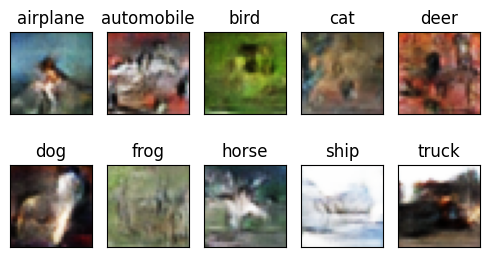

epoch = 32/120, d_loss=0.470, g_loss=2.159                                                                                                     
epoch = 33/120, d_loss=0.406, g_loss=2.426                                                                                                     
epoch = 34/120, d_loss=0.444, g_loss=1.986                                                                                                     
epoch = 35/120, d_loss=0.508, g_loss=2.271                                                                                                     
epoch = 36/120, d_loss=0.411, g_loss=2.208                                                                                                     
epoch = 37/120, d_loss=0.418, g_loss=1.901                                                                                                     
epoch = 38/120, d_loss=0.426, g_loss=2.286                                                                                              

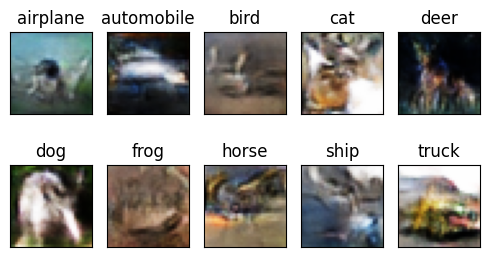

epoch = 42/120, d_loss=0.418, g_loss=2.267                                                                                                     
epoch = 43/120, d_loss=0.486, g_loss=2.292                                                                                                     
epoch = 44/120, d_loss=0.450, g_loss=2.252                                                                                                     
epoch = 45/120, d_loss=0.348, g_loss=1.908                                                                                                     
epoch = 46/120, d_loss=0.396, g_loss=2.310                                                                                                     
epoch = 47/120, d_loss=0.389, g_loss=2.546                                                                                                     
epoch = 48/120, d_loss=0.351, g_loss=2.280                                                                                              

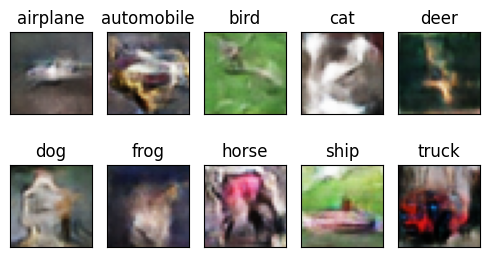

epoch = 52/120, d_loss=0.602, g_loss=2.184                                                                                                     
epoch = 53/120, d_loss=0.435, g_loss=2.066                                                                                                     
epoch = 54/120, d_loss=0.446, g_loss=2.352                                                                                                     
epoch = 55/120, d_loss=0.517, g_loss=2.560                                                                                                     
epoch = 56/120, d_loss=0.397, g_loss=1.917                                                                                                     
epoch = 57/120, d_loss=0.376, g_loss=2.123                                                                                                     
epoch = 58/120, d_loss=0.457, g_loss=1.531                                                                                              

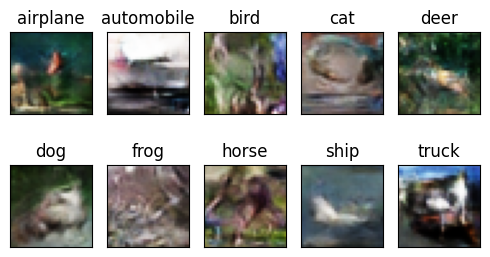

epoch = 62/120, d_loss=0.540, g_loss=2.245                                                                                                     
epoch = 63/120, d_loss=0.403, g_loss=2.664                                                                                                     
epoch = 64/120, d_loss=0.409, g_loss=2.455                                                                                                     
epoch = 65/120, d_loss=0.407, g_loss=2.389                                                                                                     
epoch = 66/120, d_loss=0.420, g_loss=2.816                                                                                                     
epoch = 67/120, d_loss=0.405, g_loss=2.472                                                                                                     
epoch = 68/120, d_loss=0.407, g_loss=2.524                                                                                              

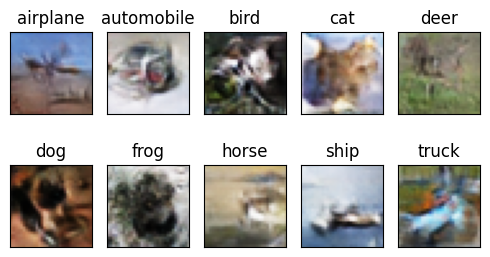

epoch = 72/120, d_loss=0.343, g_loss=2.662                                                                                                     
epoch = 73/120, d_loss=0.514, g_loss=2.597                                                                                                     
epoch = 74/120, d_loss=0.409, g_loss=2.777                                                                                                     
epoch = 75/120, d_loss=0.436, g_loss=2.069                                                                                                     
epoch = 76/120, d_loss=0.454, g_loss=2.145                                                                                                     
epoch = 77/120, d_loss=0.424, g_loss=1.987                                                                                                     
epoch = 78/120, d_loss=0.377, g_loss=2.509                                                                                              

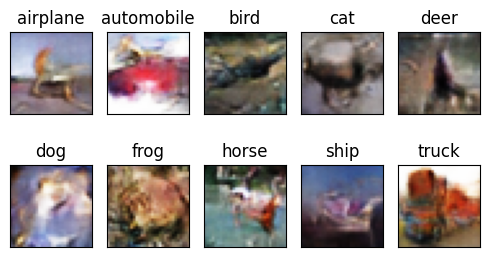

epoch = 82/120, d_loss=0.444, g_loss=2.547                                                                                                     
epoch = 83/120, d_loss=0.440, g_loss=3.000                                                                                                     
epoch = 84/120, d_loss=0.414, g_loss=2.982                                                                                                     
epoch = 85/120, d_loss=0.437, g_loss=2.145                                                                                                     
epoch = 86/120, d_loss=0.503, g_loss=2.491                                                                                                     
epoch = 87/120, d_loss=0.549, g_loss=2.344                                                                                                     
epoch = 88/120, d_loss=0.422, g_loss=2.826                                                                                              

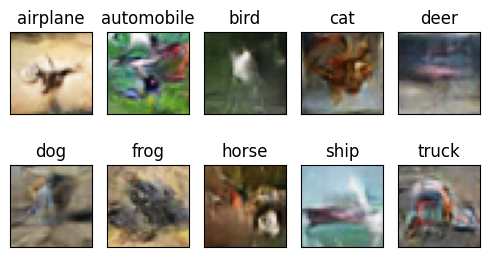

epoch = 92/120, d_loss=0.457, g_loss=2.662                                                                                                     
epoch = 93/120, d_loss=0.486, g_loss=1.621                                                                                                     
epoch = 94/120, d_loss=0.380, g_loss=2.999                                                                                                     
epoch = 95/120, d_loss=0.488, g_loss=3.324                                                                                                     
epoch = 96/120, d_loss=0.530, g_loss=2.602                                                                                                     
epoch = 97/120, d_loss=0.388, g_loss=2.833                                                                                                     
epoch = 98/120, d_loss=0.505, g_loss=2.887                                                                                              

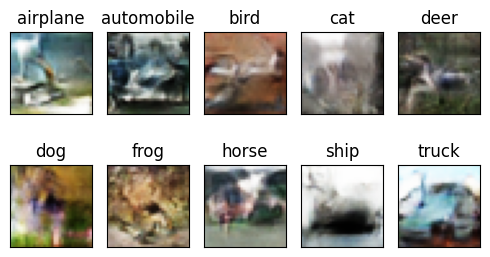

epoch = 102/120, d_loss=0.381, g_loss=2.937                                                                                                     
epoch = 103/120, d_loss=0.433, g_loss=3.294                                                                                                     
epoch = 104/120, d_loss=0.482, g_loss=2.758                                                                                                     
epoch = 105/120, d_loss=0.411, g_loss=2.863                                                                                                     
epoch = 106/120, d_loss=0.556, g_loss=2.207                                                                                                     
epoch = 107/120, d_loss=0.612, g_loss=1.851                                                                                                     
epoch = 108/120, d_loss=0.432, g_loss=2.826                                                                                       

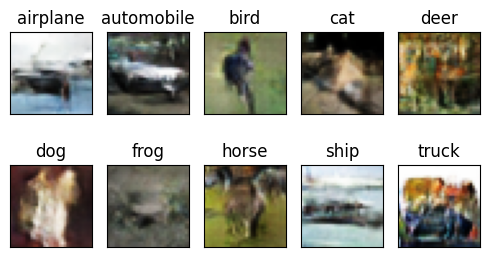

epoch = 112/120, d_loss=0.451, g_loss=3.469                                                                                                     
epoch = 113/120, d_loss=0.350, g_loss=3.255                                                                                                     
epoch = 114/120, d_loss=0.547, g_loss=3.051                                                                                                     
epoch = 115/120, d_loss=0.516, g_loss=3.375                                                                                                     
epoch = 116/120, d_loss=0.435, g_loss=2.153                                                                                                     


In [ ]:
epochs = 120
batch_size = 32
smooth = 0.1
latent_dim = 100

real = tf.ones(shape=(batch_size, 1))
fake = tf.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        discriminator.trainable = True

        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        real_labels = tf.keras.utils.to_categorical(
            y_train[i * batch_size : (i + 1) * batch_size].reshape(-1, 1),
            num_classes=10,
        )

        d_loss_real = discriminator.train_on_batch(
            x=[X_batch, real_labels], y=real * (1 - smooth)
        )

        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        random_labels = tf.keras.utils.to_categorical(
            np.random.randint(0, 10, batch_size).reshape(-1, 1), num_classes=10
        )
        X_fake = generator.predict_on_batch([z, random_labels])

        d_loss_fake = discriminator.train_on_batch(
            x=[X_fake, random_labels], y=fake
        )

        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        discriminator.trainable = False

        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        random_labels = tf.keras.utils.to_categorical(
            np.random.randint(0, 10, batch_size).reshape(-1, 1), num_classes=10
        )
        d_g_loss_batch = d_g.train_on_batch(x=[z, random_labels], y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])

    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10
        z = tf.random.normal(shape=(samples, latent_dim), mean=0, stddev=1)
        labels = tf.keras.utils.to_categorical(
            np.arange(0, 10).reshape(-1, 1), num_classes=10
        )

        x_fake = generator.predict([z, labels])
        x_fake = np.clip(x_fake, -1, 1)
        x_fake = (x_fake + 1) * 127
        x_fake = np.round(x_fake).astype("uint8")

        fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
        for k in range(samples):
            plt.subplot(2, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(x_fake[k])
            plt.title(class_names[k])

        plt.tight_layout()
        plt.show()

# Part III

A. Transfer Learning for Small and Very Different Datasets:

Introduction and Context (1 minute):
Provide an overview of transfer learning: Explain the concept of transfer learning, where knowledge gained from a source task is applied to a target task.
Describe the scenario: Introduce the situation of having a small and dissimilar dataset where traditional training from scratch may not be feasible.


Explanation of Transfer Learning Approach (1.5 minutes):
Discuss fine-tuning: Explain the process of fine-tuning a pre-trained model by adjusting its parameters to better suit the new dataset.
Freeze and adapt layers: Describe the strategy of freezing some layers of the pre-trained model while adapting others to the new dataset.
Highlight benefits: Emphasize how transfer learning can leverage the knowledge encoded in the pre-trained model to improve performance on the new task.


Data Preprocessing Considerations (0.5 minutes):
Briefly touch upon data preprocessing: Mention the importance of preprocessing steps such as resizing images, data augmentation, and normalization.
Explain relevance: Discuss how appropriate preprocessing can enhance model training and generalization, especially for small and dissimilar datasets



.
Training Process (1 minute):
Describe model setup: Explain how to set up the transfer learning model by loading the pre-trained model and adding custom layers for adaptation.
Select optimizer: Discuss the choice of optimizer and how it affects model training.
Monitor performance metrics: Highlight the importance of monitoring performance metrics during training to ensure model convergence and effectiveness.



Evaluation and Fine-Tuning (1 minute):
Explain evaluation process: Describe how to evaluate the model's performance on the new dataset using metrics such as accuracy, precision, recall, etc.
Discuss fine-tuning: Mention the possibility of fine-tuning hyperparameters based on validation results to further improve model performance.
Emphasize iteration: Stress the iterative nature of the process, where evaluation and fine-tuning may be repeated until satisfactory performance is achieved

# what is transfer learning


Introduction:

Transfer learning is a powerful technique in machine learning where knowledge gained from solving one problem is applied to a different but related problem. It's like leveraging what you've already learned in one area to excel in another.

Scenario:

Imagine you have a small dataset, perhaps only a few hundred examples, and it's quite dissimilar to the data you ultimately want to apply your model to. Training a model from scratch with such limited and dissimilar data might not yield satisfactory results. This is where transfer learning steps in as a lifesaver.

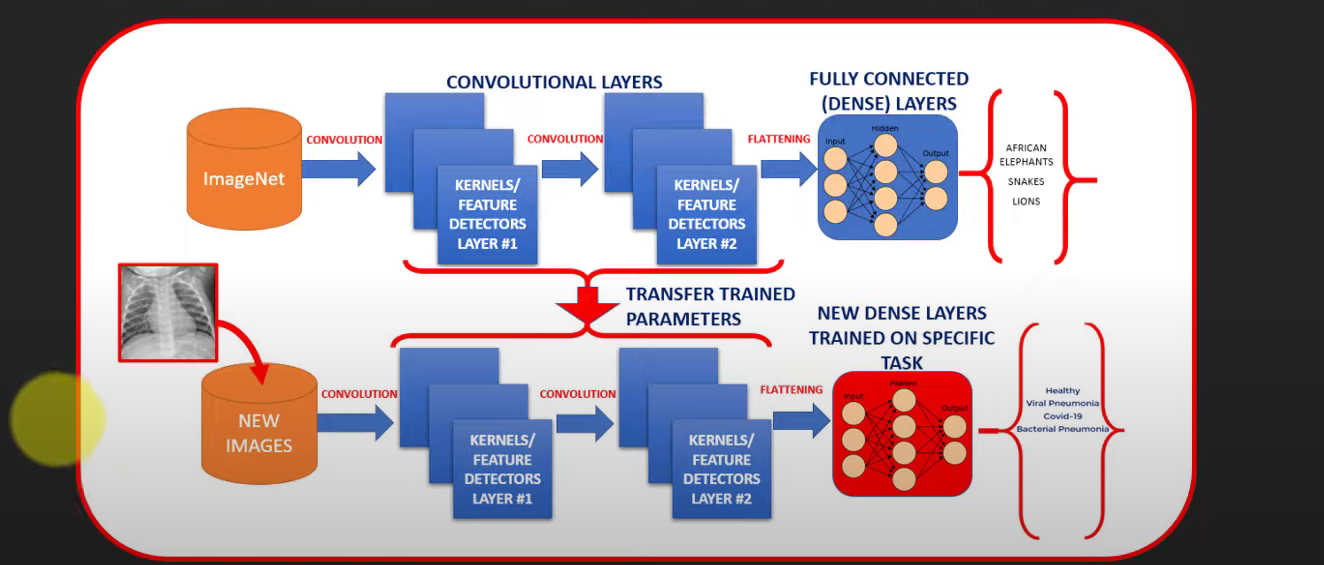

When your dataset is small and very different from the original dataset used to train the pre-trained model, you can employ Transfer Learning in the following way:

Use the pre-trained model as a feature extractor: You can remove the last layer (output layer) of the pre-trained model and replace it with a new layer(s) specific to your task. The layers of the pre-trained model will act as a feature extractor and the new layers will act as a classifier for your specific task.
Freeze the weights of the pre-trained model: During training, you can freeze the weights of the pre-trained model. This is done to preserve the learned features.
Train the model on your dataset: Now, you can train the model on your small dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
base_model.trainable = False
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4908 - accuracy: 0.4774 - val_loss: 1.2780 - val_accuracy: 0.5522
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3026 - accuracy: 0.5427 - val_loss: 1.2192 - val_accuracy: 0.5728
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2464 - accuracy: 0.5631 - val_loss: 1.1826 - val_accuracy: 0.5820
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2149 - accuracy: 0.5741 - val_loss: 1.1598 - val_accuracy: 0.5928
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1832 - accuracy: 0.5867 - val_loss: 1.1609 - val_accuracy: 0.5914
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1719 - accuracy: 0.5908 - val_loss: 1.1471 - val_accuracy: 0.5916
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1530 - accuracy: 0.5984 - val_loss: 1.1478 -

# B

When your dataset is small but similar to the original dataset used to train the pre-trained model, you can employ Transfer Learning in the following way:

Use the pre-trained model as a feature extractor: Similar to the previous case, you can remove the last layer (output layer) of the pre-trained model and replace it with a new layer(s) specific to your task. The layers of the pre-trained model will act as a feature extractor and the new layers will act as a classifier for your specific task.
Fine-tune some layers of the pre-trained model: Since your dataset is similar to the original dataset, you can fine-tune some layers of the pre-trained model. This means you allow the weights of the last few layers of the pre-trained model to be updated during training. This helps the model to adapt to your specific task while preserving most of the learned features.
Train the model on your dataset: Now, you can train the model on your small dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 54s 32ms/step - loss: 1.8289 - accuracy: 0.2618 - val_loss: 1.5126 - val_accuracy: 0.4070
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4180 - accuracy: 0.4518 - val_loss: 1.2953 - val_accuracy: 0.5071
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1770 - accuracy: 0.5643 - val_loss: 1.0610 - val_accuracy: 0.6246
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9819 - accuracy: 0.6568 - val_loss: 0.9446 - val_accuracy: 0.6673
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8781 - accuracy: 0.6996 - val_loss: 0.8689 - val_accuracy: 0.7109
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7849 - accuracy: 0.7363 - val_loss: 0.8112 - val_accuracy: 0.7274
Epoch 7/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7320 - accuracy: 0.7552 - val_loss: 0.7681 -